                                                                                    

# Jamboree Education - Linear Regression




                                                                                                             

## Bisinuss problem

Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### Data details:

    • Serial No. (Unique row ID)
    • GRE Scores (out of 340)
    • TOEFL Scores (out of 120)
    • University Rating (out of 5)
    • Statement of Purpose and Letter of Recommendation Strength (out of 5)
    • Undergraduate GPA (out of 10)
    • Research Experience (either 0 or 1)
    • Chance of Admit (ranging from 0 to 1)


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Data importing

In [2]:
df=pd.read_csv('Jamboree_Admission1.csv')

In [3]:
df1=df.rename(columns={"Chance of Admit":"Chance_of_Admit"})


In [4]:
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
for i in df1.columns:
    print(i,'minimum',':',min(df1[i]))
    print(i,'maximum',':',max(df1[i]))

Serial No. minimum : 1
Serial No. maximum : 500
GRE Score minimum : 290
GRE Score maximum : 340
TOEFL Score minimum : 92
TOEFL Score maximum : 120
University Rating minimum : 1
University Rating maximum : 5
SOP minimum : 1.0
SOP maximum : 5.0
LOR  minimum : 1.0
LOR  maximum : 5.0
CGPA minimum : 6.8
CGPA maximum : 9.92
Research minimum : 0
Research maximum : 1
Chance of Admit  minimum : 0.34
Chance of Admit  maximum : 0.97


# Data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* There is no null values in the data

# No.of unique values in each column

In [9]:
for i in df.columns:
    print(i,':',df[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [10]:
df.shape

(500, 9)

In [11]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [12]:
df1=df.set_index('Serial No.')

In [13]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


## Non-graphical Analysis

In [14]:
df1.groupby('University Rating')['Research'].count().sort_values(ascending=False).to_frame().reset_index()

,University Rating,Research
0,3,162
1,2,126
2,4,105
3,5,73
4,1,34


* From this we can say that those university who claim high rating not that much  bothered  about research experienced student 
* But univerisitires have  rating 2,3,4 give more priority to  students who  experience in research 

In [15]:
df1.groupby('Chance of Admit ')['Research'].count().sort_values(ascending=False).to_frame().reset_index()

,Chance of Admit,Research
0,0.71,23
1,0.64,19
2,0.73,18
3,0.72,16
4,0.79,16
...,...,...
56,0.38,2
57,0.34,2
58,0.43,1
59,0.39,1


In [16]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


* Out of 1 people who have experience in research feild have more chances to admit 

In [17]:
df1.groupby(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research',])['Chance of Admit '].count().sort_values(ascending=True).to_frame().reset_index()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,290,100,1,1.5,2.0,7.56,0,1
1,323,108,5,4.0,4.0,8.74,1,1
2,323,108,3,3.5,3.0,8.60,0,1
3,323,107,4,3.0,2.5,8.48,1,1
4,323,107,3,3.5,3.5,8.55,1,1
...,...,...,...,...,...,...,...,...
495,311,104,3,4.0,3.5,8.13,1,1
496,311,104,3,3.5,2.0,8.20,1,1
497,311,104,2,2.5,3.5,8.48,0,1
498,312,103,3,3.5,4.0,8.78,0,1


* If the score point of GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA,Research greater than 50% the possibility of chance of admit is 1

In [18]:
df1.median(axis=0)

GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.56
Research               1.00
Chance of Admit        0.72
dtype: float64

In [19]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
df1.groupby('University Rating')['SOP'].mean().sort_values(ascending=False).to_frame().reset_index()

,University Rating,SOP
0,5,4.479452
1,4,4.000000
2,3,3.308642
3,2,2.682540
4,1,1.941176


* If mean value of sop is high in university have high rating

In [21]:
df1.groupby('University Rating')['TOEFL Score'].mean().sort_values(ascending=False).to_frame().reset_index()

,University Rating,TOEFL Score
0,5,113.438356
1,4,110.961905
2,3,106.314815
3,2,103.444444
4,1,100.205882


* If mean value of TOEFL Score is high in university have high rating

In [22]:
df1.groupby('University Rating')['GRE Score'].mean().sort_values(ascending=False).to_frame().reset_index()

,University Rating,GRE Score
0,5,327.890411
1,4,323.304762
2,3,315.030864
3,2,309.134921
4,1,304.911765


* If mean value of GRE Score is high in university have high rating

* By checking the relation of University Rating with GRE Score,TOEFL Score,SOP we can say that more than 50% score needed for 
get admit in university have high score

# Data visual analysis

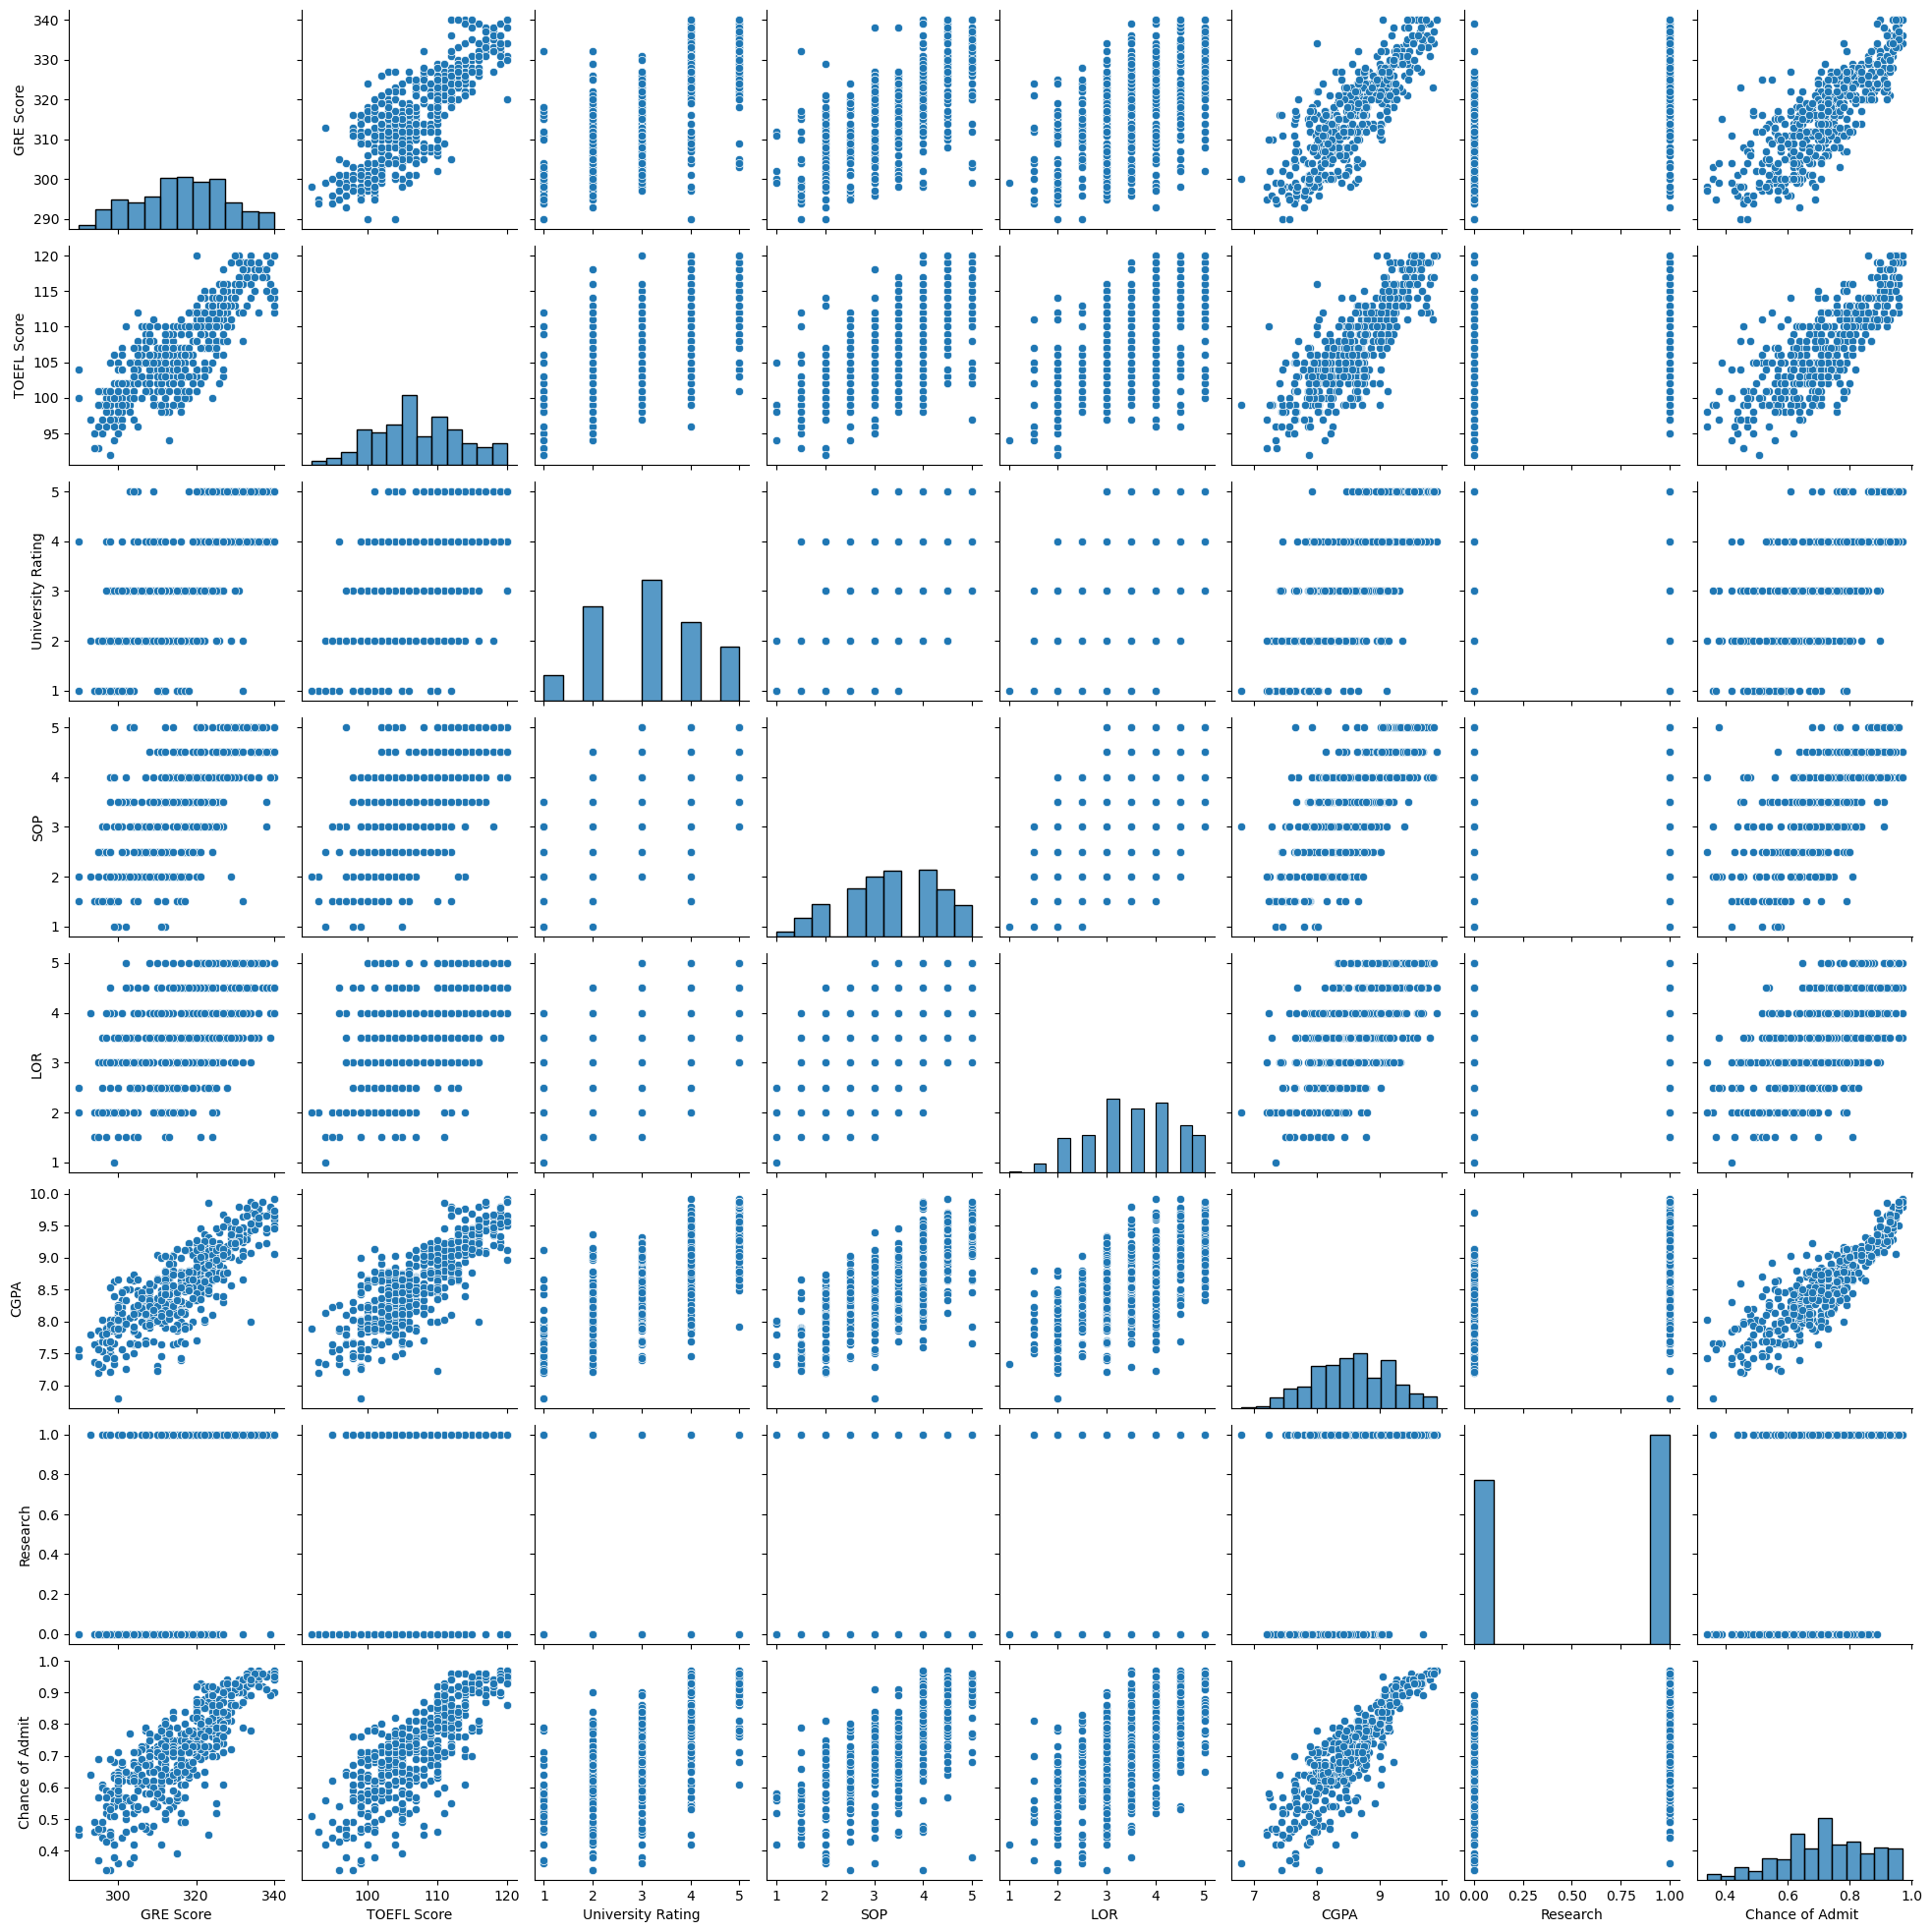

In [23]:
sns.pairplot(df1)

* Analysing through this pair plot we can see the linear relationship between GREScore,TOEFL Score, University Rating, SOP, 
  LOR , CGPA, Research, with chance of admit
* If GRE Score increases the chance of admit also increasing
* If GRE Score increases the chance of admit also increasing
* If SOP increases the chance of admit also increasing
* If LOR increases the chance of admit also increasing
* If CGPA increases the chance of admit also increasing
* If no of research experienced increases the chance of admit also increasing


<Axes: ylabel='Research'>

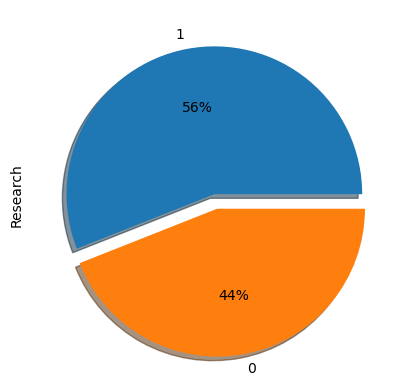

In [24]:
df1['Research'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct='%.0f%%')

* research experienced : 56%
* not experienced: 44%
* It shows that count of research experienced students  is more .from that point we can say if student was research experienced 
  she/he have more possibility

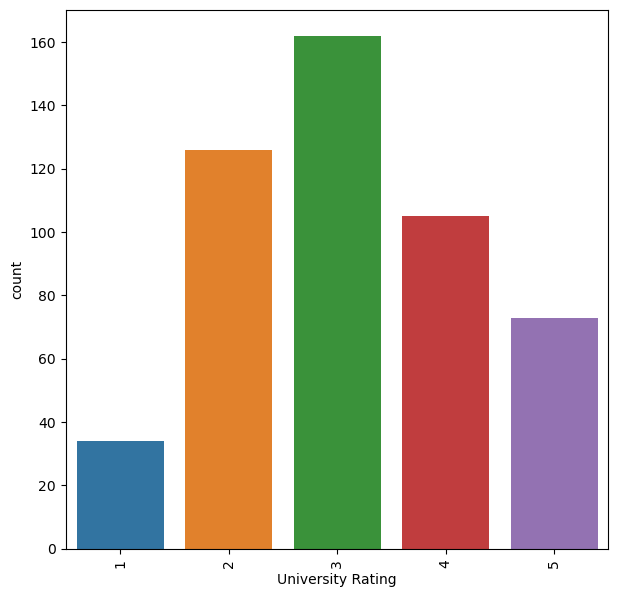

In [28]:
plt.figure(figsize=(7,7))
sns.countplot(x='University Rating',data=df1)
plt.xticks(rotation=90)
plt.show()

* From this information we can say that count of students admited high in university who have rating 3
* Later university have rate 2, admit more students
* Count of students admited in university have rate 5 is low compaired to rate 2,3,4

## How GRE_score relate to University rating

[]

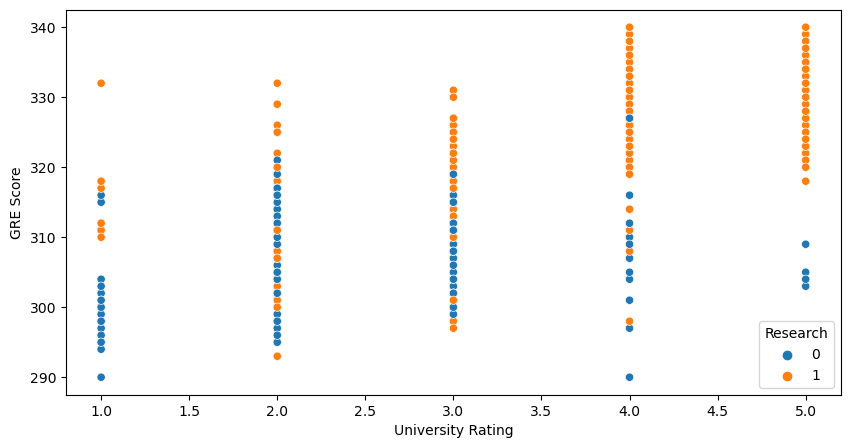

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='University Rating',y='GRE Score',data=df1,hue='Research')
plt.plot()

* If GRE Score high and the student is experienced in research the chance of admit is high
* The possibility of admit in university have rating 5 is more 

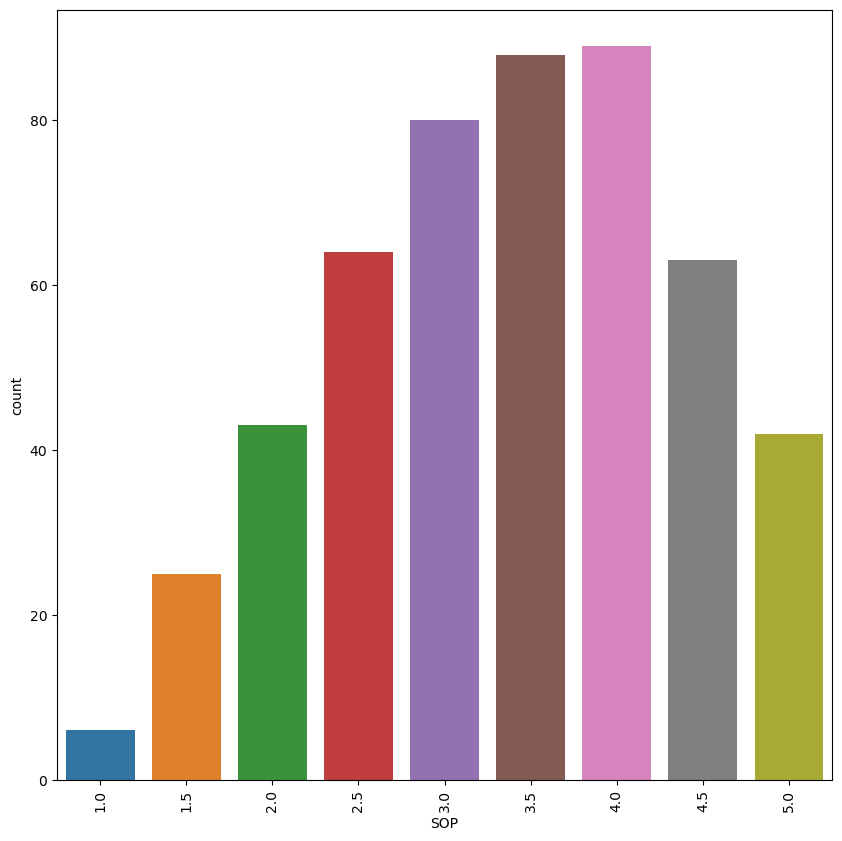

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='SOP',data=df)
plt.xticks(rotation=90)
plt.show()

## How TOEFL Score  related to Research and  University Rating

[]

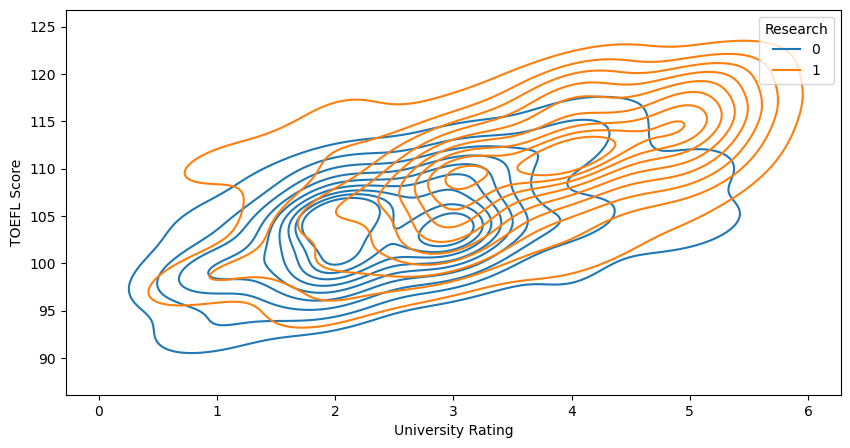

In [32]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='University Rating',y='TOEFL Score',data=df1,hue='Research')
plt.plot()

* From this plot we can conclude that students who research experienced have high toefl score and they have highly chance to get admit high rated university

In [33]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## How SOP related to Research and University Rating

[]

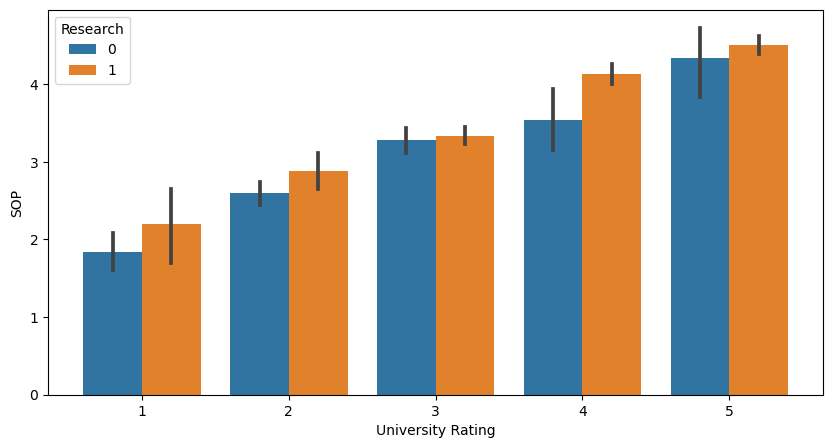

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='University Rating',y='SOP',data=df1,hue='Research')
plt.plot()

* By this we can say compaired to students those are not experience in research ,students experience in research have more chance to admit highly rated universities.
* But  university which rated 3 give almost equal priority for those students
* Also if SOP  score is high chance of getting admission in highly rated university is high

## How LOR related to Research and University Rating

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


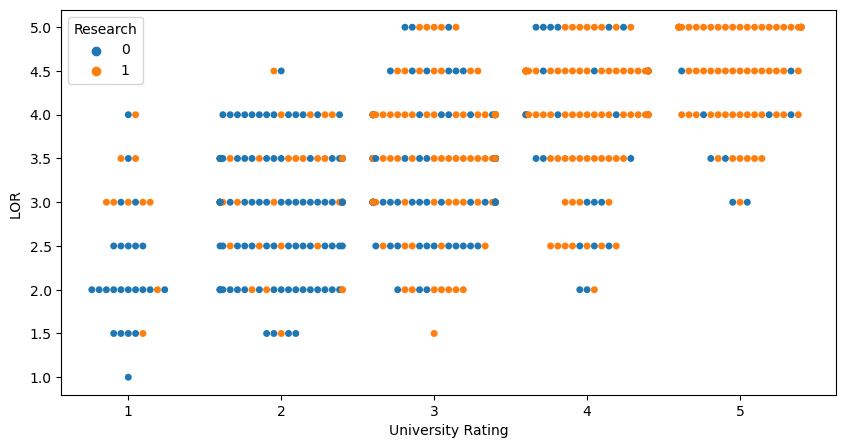

In [35]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='University Rating',y='LOR ',data=df1,hue='Research')
plt.plot()

* From this diagram we can say that people who are experienced in research achieve LOR  more than 50%  and also people who acheive good in LOR mostly admit in university rated 4,5
* From this point of view we can say  experienced in research value influence LOR

## How CGPA related to Research and University Rating

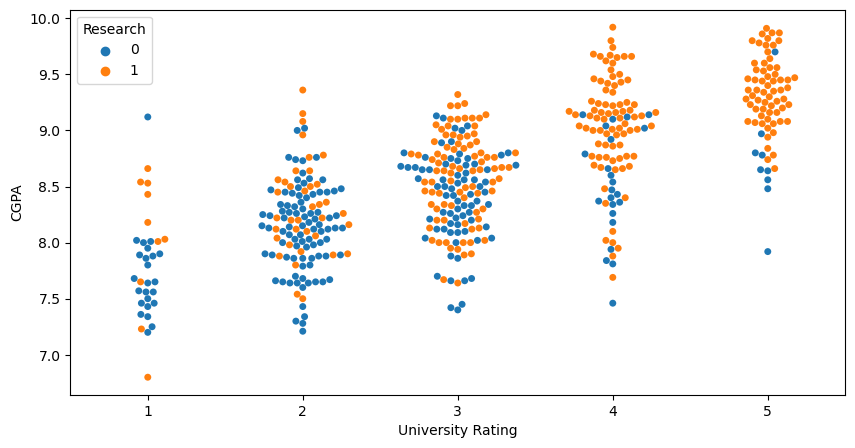

In [36]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='University Rating',y='CGPA',data=df1,hue='Research')
plt.show()



<Figure size 1000x500 with 0 Axes>

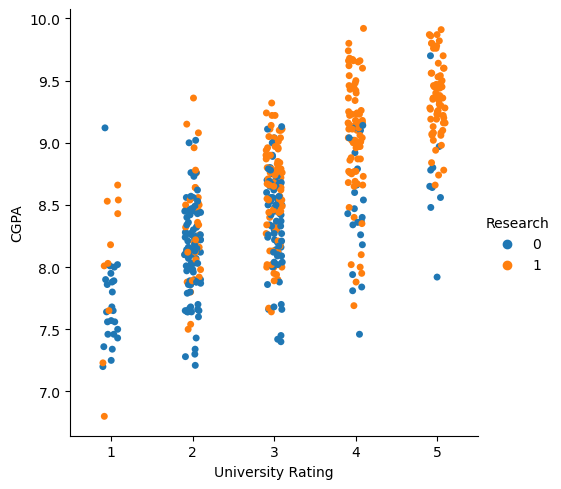

In [37]:
plt.figure(figsize=(10,5))
sns.catplot(x='University Rating',y='CGPA',data=df1,hue='Research')
plt.show()


<Axes: xlabel='University Rating', ylabel='CGPA'>

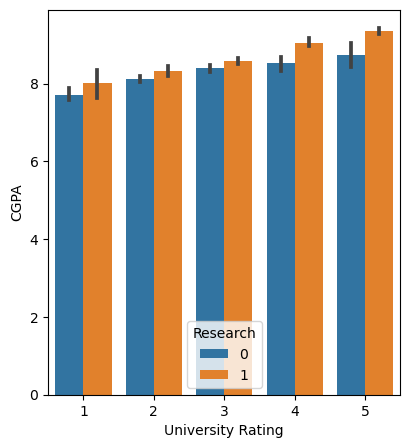

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.barplot(x='University Rating',y='CGPA',data=df1,hue='Research')


* From this diagram we can say that people who are experienced in research achieve CGPA greater than 90% and
 also people who acheive greaterthan 90% in CGPA mostly admit in university rated 4,5
* From this point of view we can say experienced in research and high CGPA  influence the chance of admit in highly rated uni

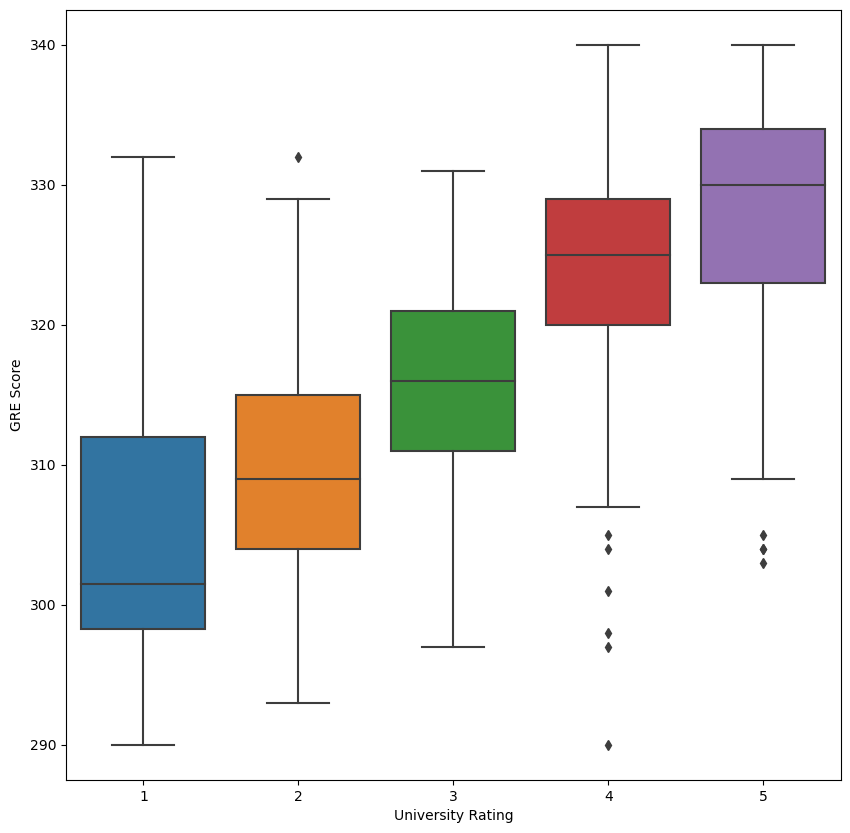

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'GRE Score', data = df1)
plt.show()

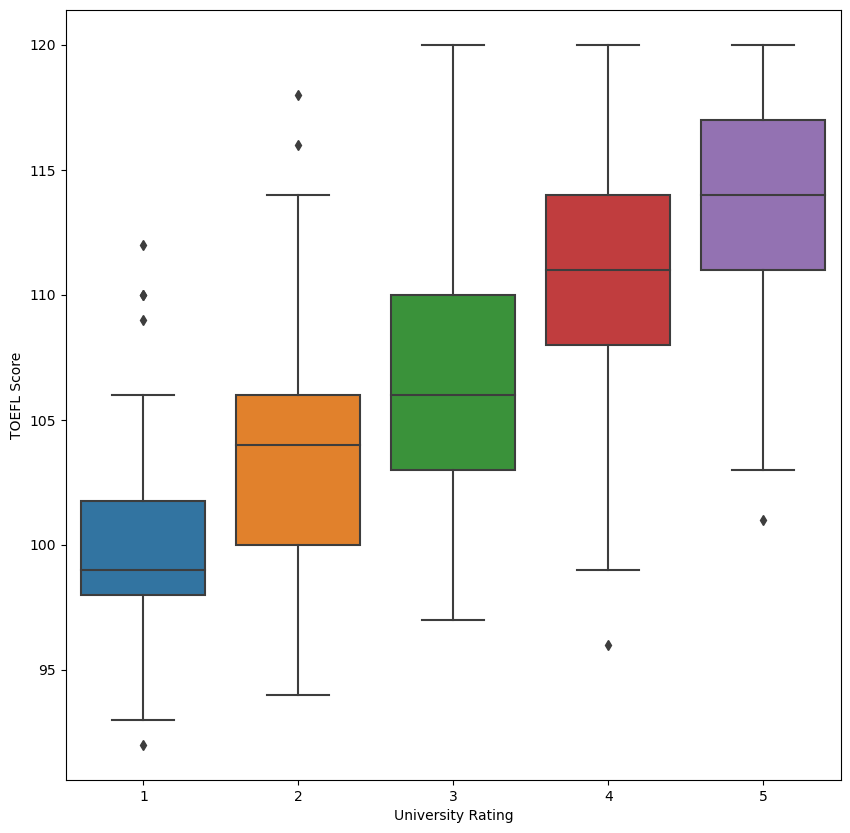

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'TOEFL Score', data = df1)
plt.show()

# CORRELATION

<Axes: >

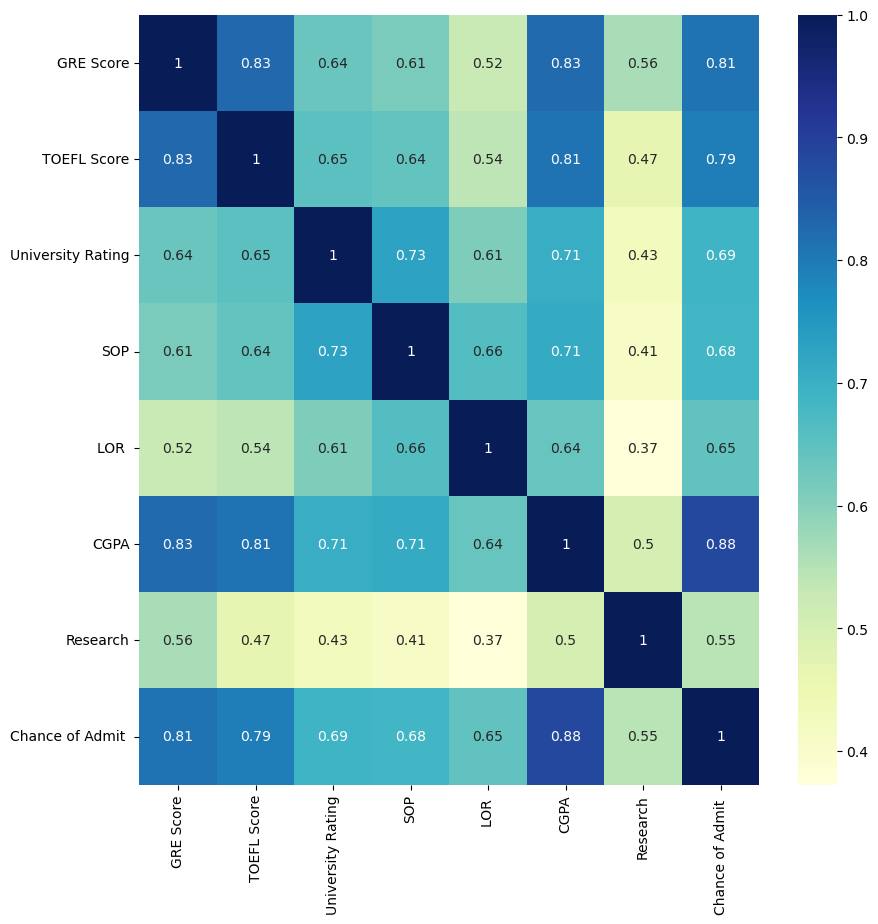

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

* From this correlation plot we can say which column highly corrrelated to each other
    *  The correlation between GRE Score and TOEFL Score is 0.83 it make multicolinearity
    *  Also the correlation between GRE Score and CGPA is 0.83 it make multicolinearity 
    * The relation  of CGPA with chance of admit is high 0.88.It show that if CGPA is high the chance of admit is high

# Standardisation

* In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable.

In [42]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(df1)
# Transform the dataset to have zero mean and unit variance
X_standardized = scaler.transform(df1)
X=pd.DataFrame(X_standardized, columns=[
 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '])

In [43]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [44]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [45]:
y=X['Chance of Admit ']

In [46]:
y

0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance of Admit , Length: 500, dtype: float64

In [47]:
x=X.drop('Chance of Admit ',axis=1)

In [48]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


### Building model

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [51]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [52]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152
...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405


In [53]:
y_train

153    0.484116
84     1.547952
310    0.271349
494   -0.296030
126    0.909651
         ...   
343   -0.934332
359    0.625961
323   -0.721564
280   -0.296030
8     -1.572633
Name: Chance of Admit , Length: 350, dtype: float64

In [54]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit , Length: 150, dtype: float64

In [55]:
x_train.shape

(350, 7)

In [56]:
y_train.shape

(350,)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [58]:
model.fit(x_train,y_train)

LinearRegression()

In [59]:
weight=np.zeros((7))
weight=model.coef_

In [60]:
w0=model.intercept_
w0

-0.024866812538764875

In [61]:
weight

array([0.090411  , 0.15138317, 0.04242884, 0.00388195, 0.11296889,
       0.54621902, 0.09713738])

In [62]:
np.reshape(weight,(1,7))

array([[0.090411  , 0.15138317, 0.04242884, 0.00388195, 0.11296889,
        0.54621902, 0.09713738]])

In [63]:
weight[0]

0.09041100444228006

# MODEL

In [64]:
print(model.coef_)


[0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]


In [65]:
print(model.intercept_)

-0.024866812538764875


In [66]:
y_hat=np.dot(weight,np.transpose(x_train))+w0
y_hat

array([ 8.55023226e-02,  1.43262567e+00,  1.54089639e-01, -5.70140696e-01,
        8.69529436e-01,  1.33924826e+00,  7.41409059e-01, -1.17428786e+00,
       -1.07093828e+00,  1.36712736e-01,  1.06977143e+00, -1.73385112e-01,
       -3.34531841e-01, -1.31133466e+00,  1.33035350e-01, -2.38221894e-02,
       -1.04109283e+00,  8.66305650e-01, -9.15541443e-01, -6.01008990e-01,
        5.79726122e-02,  1.77649090e+00, -2.04715354e-01,  7.88278815e-01,
       -4.02561995e-01,  8.06078551e-01,  3.88423081e-01, -1.45788435e+00,
       -2.83982298e-01, -8.09610395e-01, -1.91889028e+00,  1.51133518e+00,
        1.06345798e+00, -1.23815816e+00,  6.46926516e-01, -2.65885746e-01,
        1.10996644e+00,  5.96287569e-01,  3.25903385e-01, -8.85667491e-01,
        2.94001644e-01, -1.56785369e+00, -1.15406653e+00, -1.47711776e+00,
        1.07711273e-01, -1.52809579e+00, -1.43103905e+00, -5.82759951e-01,
        1.83281801e-01, -9.06212261e-01,  1.03664898e+00,  1.32555378e+00,
        2.29543930e-01, -

In [67]:
print('Actual value')
y[:]

Actual value


0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance of Admit , Length: 500, dtype: float64

# y_train_predicted and y_train_actual

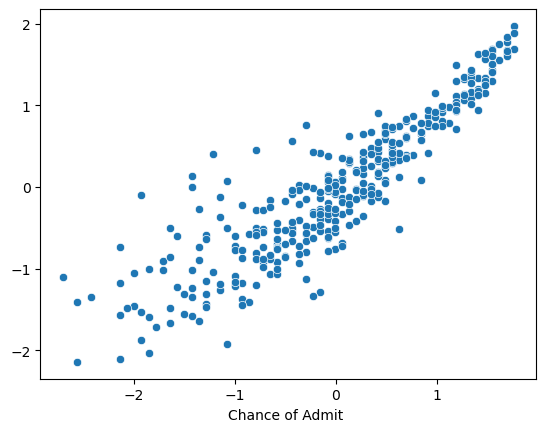

In [68]:
sns.scatterplot(x=y_train,y=y_hat)
plt.show()

* Here actual value and predicted value shows linear relatioship

# predicted y_test and actual y_test 

In [69]:
y_predicted_test=model.predict(x_test)
y_predicted_test

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

<Axes: xlabel='Chance of\xa0Admit '>

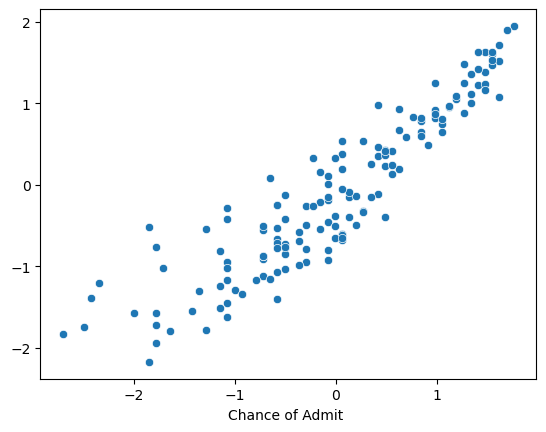

In [70]:
sns.scatterplot(x=y_test,y=y_predicted_test)

* Here actual value and predicted value shows linear relatioship

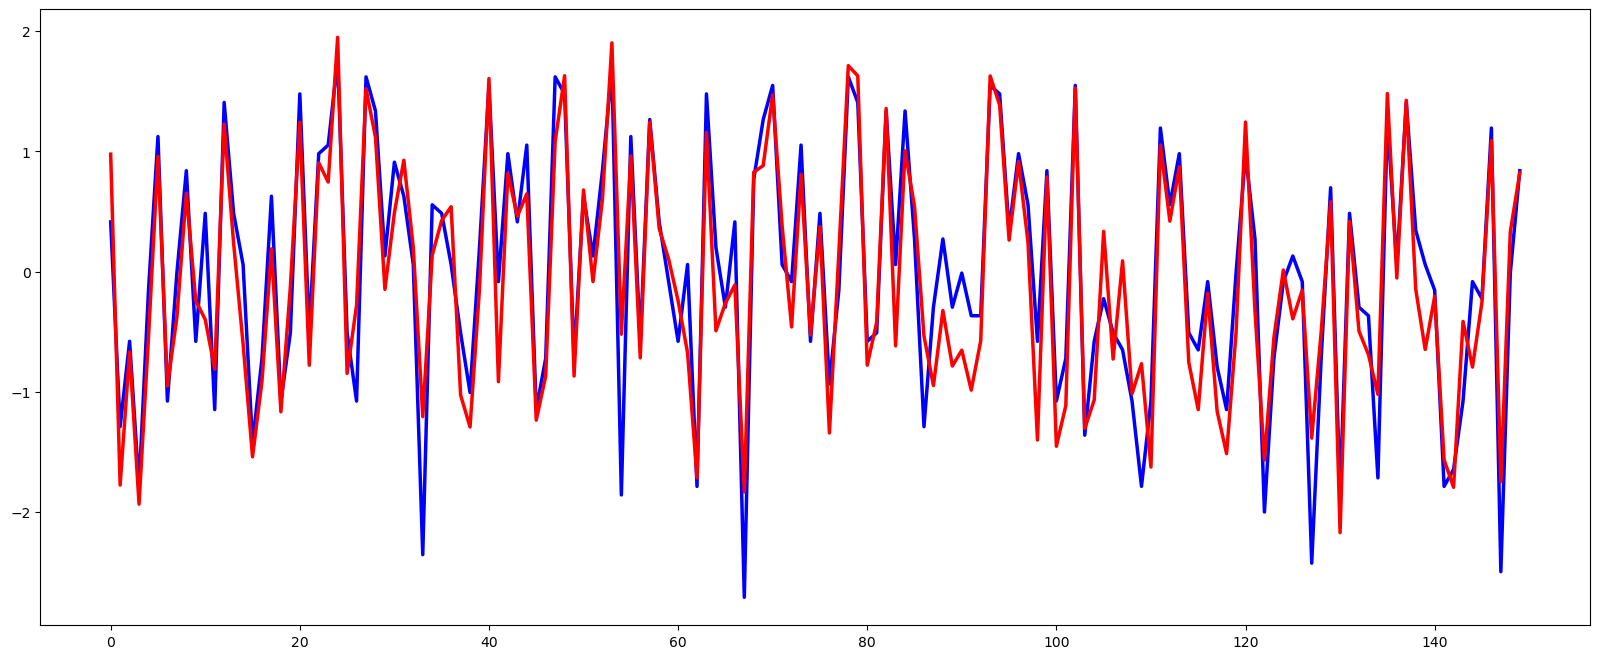

In [71]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test,color="blue",  linewidth=2.5, linestyle="-")
plt.plot(c,y_predicted_test,color="red",  linewidth=2.5, linestyle="-")


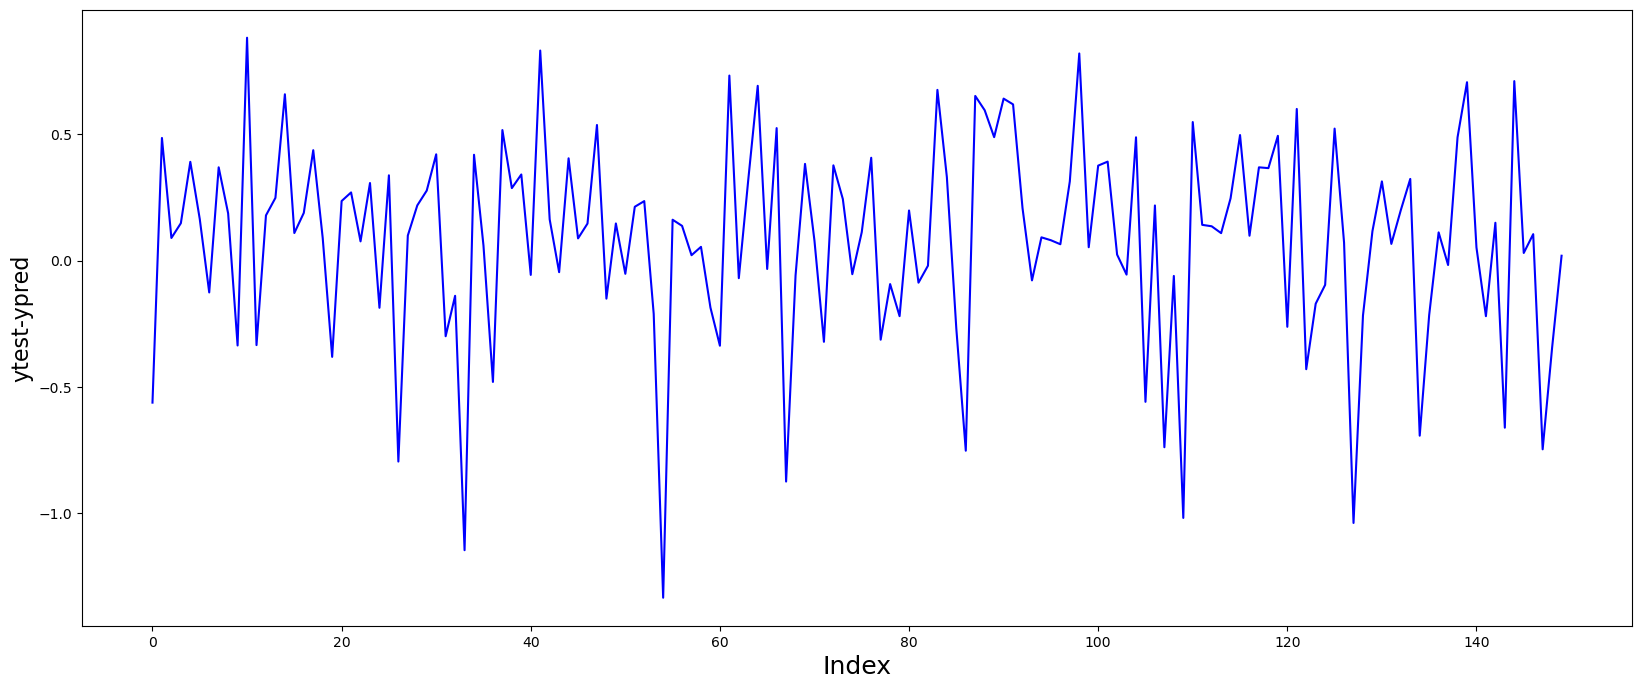

In [72]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,np.array(y_test-y_predicted_test),color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()


*  Distribution of Residual in y_test and y_predicted around -1.9984

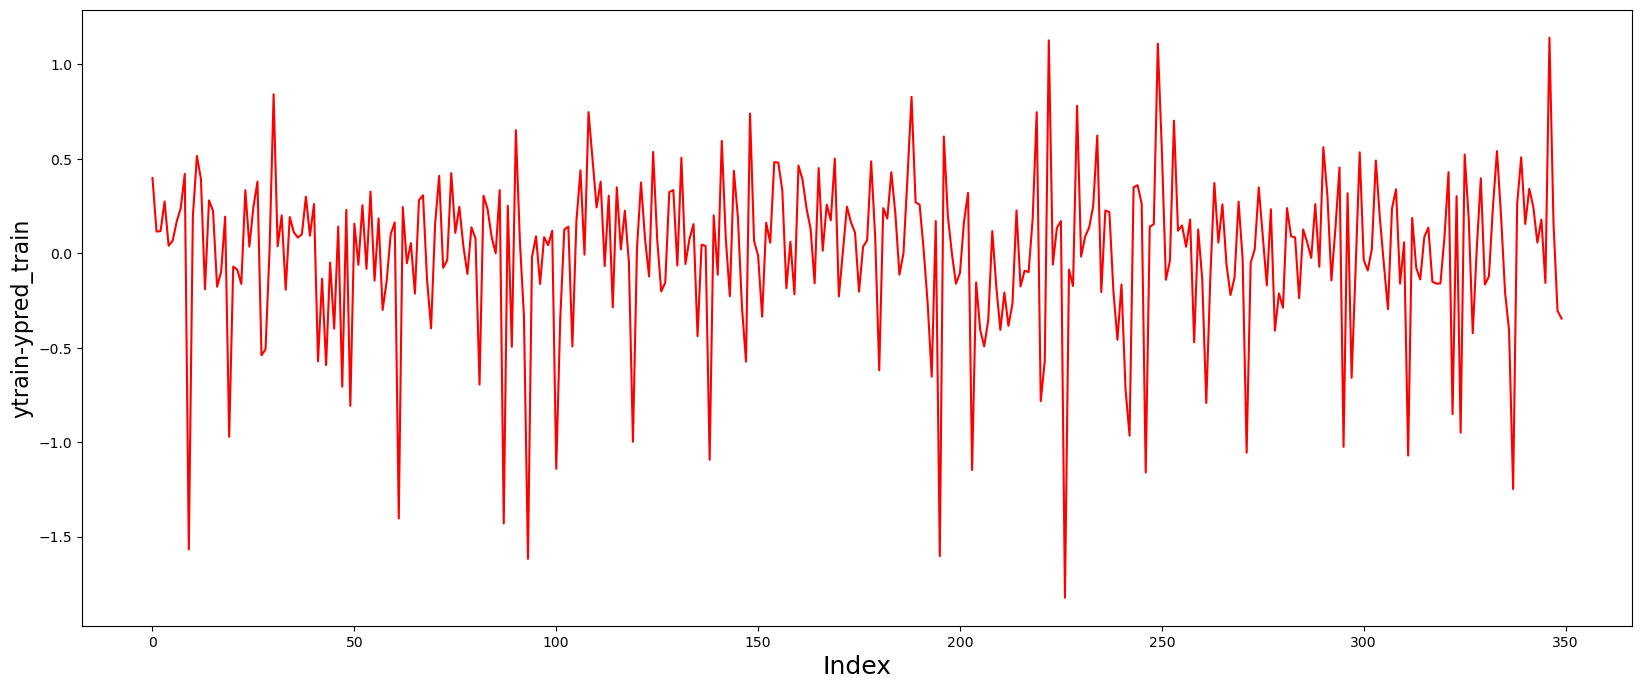

In [73]:
c = [i for i in range(0,350,1)]
plt.figure(figsize=(20,8))
plt.plot(c,np.array(y_train-y_hat),color="red")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytrain-ypred_train', fontsize=16) # Y-label
plt.show()


Distribution of Residual in y_test and y_predicted around -2.0935

In [91]:
model.score(x_train,y_train)

0.8132510822066584

* Accuracy of train data is 81.32%

In [92]:
model.score(x_test,y_test)

0.8355717634850118

* Accuracy of train data is 83.55%

# Display model coefficients with column names

In [93]:
columns=np.array(x_train.columns)
for i in range(7):
    ds=print(columns[i],":",weight[i])
ds=[[ds]]

GRE Score : 0.09041100444228006
TOEFL Score : 0.1513831691346033
University Rating : 0.04242884182922707
SOP : 0.003881950858449973
LOR  : 0.11296889349260139
CGPA : 0.5462190201662892
Research : 0.09713738365964267


* CGPA have high feature importance than others

# Testing the assumptions of the linear regression model


Mainly there are 7 assumptions taken while using Linear Regression:

## Linear Model
* No Multicolinearlity in the data
* Homoscedasticity of Residuals or Equal Variances
* No Autocorrelation in residuals
* Number of observations Greater than the number of predictors
* Each observation is unique
Predictors are distributed Normally
 


## Check the mean of residuals is nearly zero 

In [94]:
residuals=y_train-y_hat

In [95]:
residuals.mean()

-2.093563417864581e-17

In [96]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit , Length: 150, dtype: float64

In [97]:
y_predicted_test

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

In [98]:
res=np.array(y_test-y_predicted_test)
res

array([-0.56287849,  0.48546547,  0.08934906,  0.14778161,  0.39087279,
        0.16417149, -0.12644842,  0.36917334,  0.18669714, -0.33655855,
        0.88251524, -0.33502162,  0.17878578,  0.24813255,  0.65849611,
        0.10886259,  0.18861168,  0.43701677,  0.08939417, -0.38161584,
        0.23567239,  0.26971061,  0.07579097,  0.30696106, -0.18723674,
        0.33751887, -0.79628933,  0.09893518,  0.21821392,  0.27699777,
        0.42060405, -0.29985953, -0.13979516, -1.14739266,  0.41894184,
        0.05918342, -0.48089656,  0.51674959,  0.28687339,  0.34082338,
       -0.05694214,  0.83172291,  0.16291698, -0.04616601,  0.40489871,
        0.08767329,  0.14645531,  0.53685815, -0.15098258,  0.14674324,
       -0.05257385,  0.21287274,  0.23533959, -0.21137004, -1.3356443 ,
        0.16161069,  0.13723794,  0.02109888,  0.05418552, -0.18636624,
       -0.33739438,  0.73261227, -0.06990565,  0.32006964,  0.6920188 ,
       -0.03344969,  0.52454498, -0.87551773, -0.05884456,  0.38

In [99]:
res1=np.array(y_train-y_hat)
res1

array([ 3.98613924e-01,  1.15326455e-01,  1.17259431e-01,  2.74110632e-01,
        4.01211610e-02,  6.68590795e-02,  1.68241538e-01,  2.39956275e-01,
        4.20296258e-01, -1.56750107e+00,  1.94491124e-01,  5.15656575e-01,
        3.93113737e-01, -1.90376060e-01,  2.80158505e-01,  2.24248869e-01,
       -1.76928328e-01, -9.84998366e-02,  1.93977029e-01, -9.71624126e-01,
       -7.03131084e-02, -8.66939908e-02, -1.62237101e-01,  3.34138958e-01,
        3.56095404e-02,  2.45416829e-01,  3.79382732e-01, -5.40283118e-01,
       -5.08504508e-01,  1.71235892e-02,  8.42713907e-01,  3.66169393e-02,
        2.00804580e-01, -1.92630174e-01,  1.91801689e-01,  1.11700467e-01,
        8.33737279e-02,  1.00595852e-01,  3.00057645e-01,  9.31806850e-02,
        2.61036994e-01, -5.72158558e-01, -1.34877016e-01, -5.91972102e-01,
       -4.91293773e-02, -3.99149284e-01,  1.42095498e-01, -7.06183597e-01,
        2.29912054e-01, -8.08265638e-01,  1.56691185e-01, -6.12912231e-02,
        2.54572317e-01, -

In [100]:
resi=res1.mean()
resi

-2.093563417864581e-17

# Linearity of variables 

In [101]:
m=x_train.copy()
m['Residuals']=residuals
m['predicted_y']=y_hat
m

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Residuals,predicted_y
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152,0.398614,0.085502
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405,0.115326,1.432626
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405,0.117259,0.154090
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405,0.274111,-0.570141
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405,0.040121,0.869529
...,...,...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152,-0.157073,-0.777259
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152,1.141453,-0.515492
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152,0.159561,-0.881125
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405,-0.304751,0.008721


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


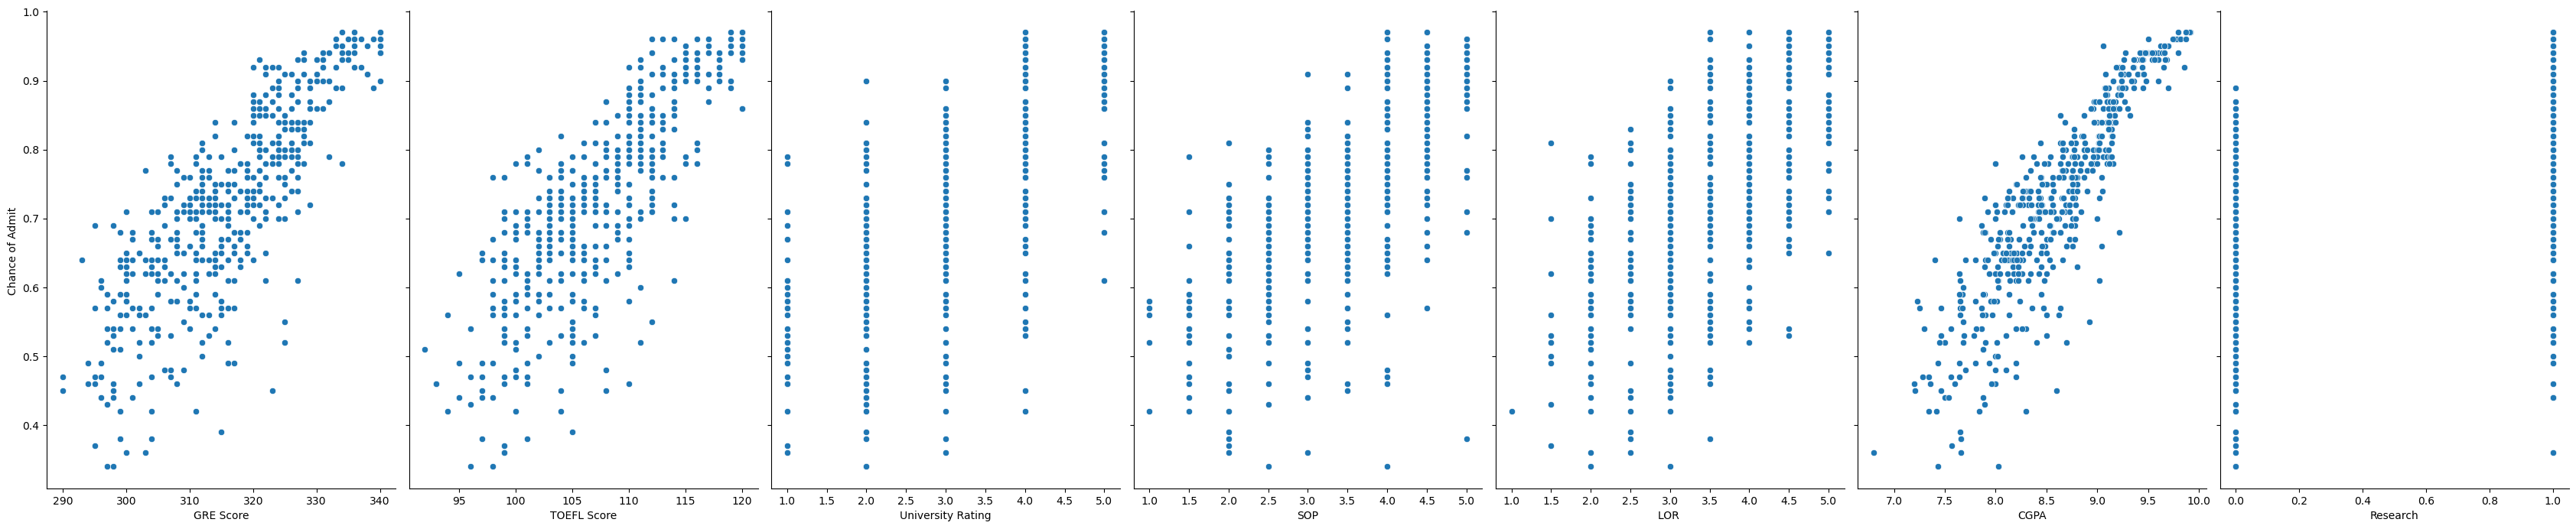

In [102]:
sns.pairplot(df1, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ',size=7, aspect=0.7, kind='scatter')

* we can see all the features are linearly dependent to chance of admit

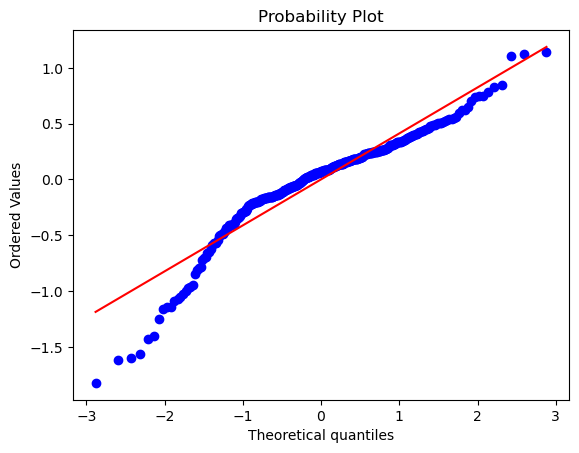

In [103]:
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

<Axes: xlabel='predicted_y', ylabel='Residuals'>

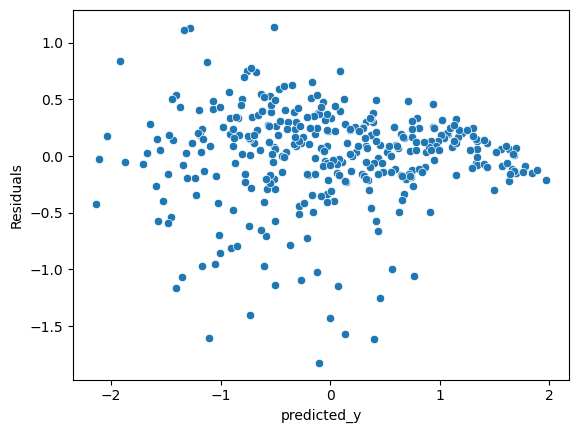

In [104]:
sns.scatterplot(x='predicted_y',y='Residuals',data=m)

## Multicollinearity check by VIF score(variables are dropped one-by-one till none has VIF>5)

In [105]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


#### Consider 'GRE Score' as dependent column

In [106]:
import statsmodels.api as sm
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    xvar_names=x_train.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_train[xvar_names[i]] 
        x=x_train[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [107]:
vif_cal(x_train)

,Var,Vif
0,GRE Score,4.75
5,CGPA,4.69
1,TOEFL Score,3.73
3,SOP,2.73
2,University Rating,2.48
4,LOR,1.97
6,Research,1.49


* VIF values of all columns has less then 5 it is not  multi colinear

# Test for Homoscedasticity 

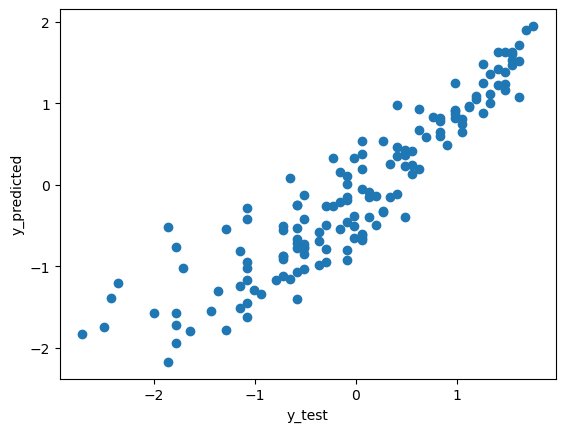

In [109]:
plt.scatter(y_test,y_predicted_test)
plt.xlabel('y_test')
plt.ylabel("y_predicted")
plt.show()

Both y_predict and y_test follow a linear passion so it is obeying homoscedacity

In [110]:
np.var(residuals)

0.18330193654838228

* The variance of residuals is less therefore  it  obey homscedasticity

# Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

<Axes: xlabel='Chance of\xa0Admit ', ylabel='Density'>

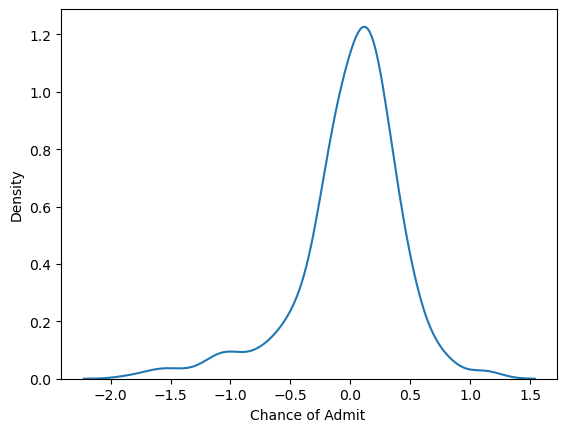

In [111]:
sns.kdeplot(residuals)


* residuals satisfying normal distribution

# Model performance evaluation 

## Mean absolute error

In [112]:
e1=sum((y_train-y_hat)**2)/x_train.shape[0]

In [113]:
e1

0.18330193654838228

# computing rms value and r**2 value 

## Root mean squared error

In [114]:
import math
rmse=math.sqrt(e1)

In [115]:
rmse

0.4281377541730959

In [116]:
from sklearn.metrics import mean_squared_error,r2_score

In [119]:
mse=mean_squared_error(y_test,y_predicted_test)

In [120]:
mse

0.17147937943843536

# R2

In [122]:
r_squared=r2_score(y_test,y_predicted_test)

In [123]:
r_squared

0.8355717634850118

* Here the actual value and predicted values are approximately equal

* When we check accuracy of testing and training data we can say that accuracy of testing data is higher than training

# OPTIONAL STEP

In [124]:
import statsmodels.api as sm
model=sm.OLS(y_train,sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     212.8
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          1.71e-120
Time:                        21:04:04   Log-Likelihood:                -199.72
No. Observations:                 350   AIC:                             415.4
Df Residuals:                     342   BIC:                             446.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0249      0.02

* From OLS methode we can conclude that university rating,SOP,CONST are insignificant features
* But when we check vif all columns are significant.
* It make sense that all the columns are significant

# Generalisation

## RIDGE REGRESSION

In [125]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [126]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [127]:
# list of alphas to tune
from sklearn.linear_model import Ridge
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

In [128]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013120,0.011869,0.002873,0.002423,0.0001,{'alpha': 0.0001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,21,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.007706,0.004229,0.001928,0.003855,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
2,0.001211,0.002422,0.003154,0.006308,0.005,{'alpha': 0.005},0.858931,0.719429,0.802121,0.763440,...,0.790772,0.046859,18,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
3,0.003283,0.001657,0.003356,0.001968,0.007,{'alpha': 0.007},0.858931,0.719429,0.802120,0.763441,...,0.790772,0.046859,17,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
4,0.005344,0.003595,0.002955,0.003641,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731


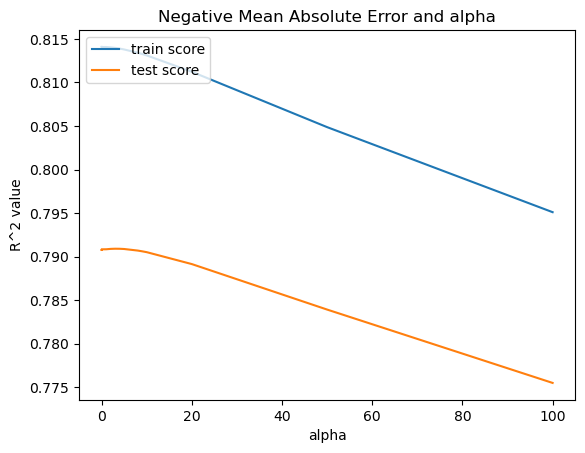

In [130]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


* From this plot we can say  hyperparameter tuning  best alpha is 5

In [131]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
ridge.coef_

array([0.10450454, 0.15398373, 0.04601386, 0.011072  , 0.11489609,
       0.51643932, 0.09517811])

In [132]:
y_pred_ridge=ridge.predict(x_test)


In [133]:
mse = mean_squared_error(y_test,y_pred_ridge)
r_squared = r2_score(y_test,y_pred_ridge)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.16937043589419762
r_square_value : 0.8375939883672355


* In Ridge regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above
83.75%

# Lasso Regression

In [134]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso,
 param_grid = params,
 scoring= 'r2',
 cv = folds,
 return_train_score=True,
 verbose = 1) 
model_cv.fit(x_train, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [135]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019605,0.030684,0.005323,0.004619,0.0001,{'alpha': 0.0001},0.858945,0.719471,0.802133,0.763562,...,0.790815,0.046838,6,0.794999,0.828307,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.006499,0.007969,0.003220,0.006441,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730
2,0.001539,0.003078,0.007169,0.006181,0.005,{'alpha': 0.005},0.859494,0.720504,0.802624,0.769378,...,0.792581,0.046146,3,0.794668,0.828238,0.813580,0.823716,0.809348,0.813910,0.011770
3,0.001460,0.002920,0.009858,0.005478,0.007,{'alpha': 0.007},0.858857,0.720687,0.802800,0.771558,...,0.793031,0.045728,2,0.794613,0.828202,0.813541,0.823396,0.809304,0.813811,0.011730
4,0.001846,0.003125,0.006237,0.005850,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730


In [136]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

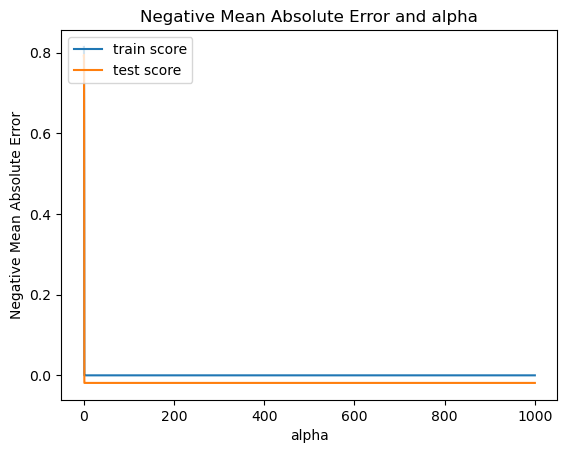

In [137]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

* By hyperparameter tuning best alpha =0.0001


In [138]:
alpha =0.0001
lasso = Lasso(alpha=alpha) 
lasso.fit(x_train, y_train)
lasso.coef_


array([0.09041277, 0.15135204, 0.04240747, 0.0038597 , 0.1129189 ,
       0.54622509, 0.09708024])

In [139]:
y_pred_lasso=lasso.predict(x_test)

In [140]:
mse = mean_squared_error(y_test, y_pred_lasso)
r_squared = r2_score(y_test, y_pred_lasso)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17146829923334972
r_square_value : 0.8355823880778254


* In lasso regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.55%

## Recommendations:


* Features which influence the chance of Admit are
    * GRE Score
    * TOEFL Score
    * CGPA
    * LOR greater 
* If student have high CGPA,RESEARCH,SOP,LOR the possibility of chance of  admit in highly rated university is increase

* CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit
* If research experienced person can crack highest score and admit highly rated university
* A higher value of LOR and SPO will also increases the chance of admission for the student

* Some of the university who rated 3 ,they give equal priority to students if they are research experienced or not

* Student  who have high CGPA  but no experience in research have chance of admit is high in universtity rated 3
